In [1]:
%load_ext autoreload
%autoreload 2
import pof_piv as piv
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from natsort import natsorted
from natsort import index_natsorted
import scipy.signal as sig
from tqdm import trange
from tqdm import tqdm

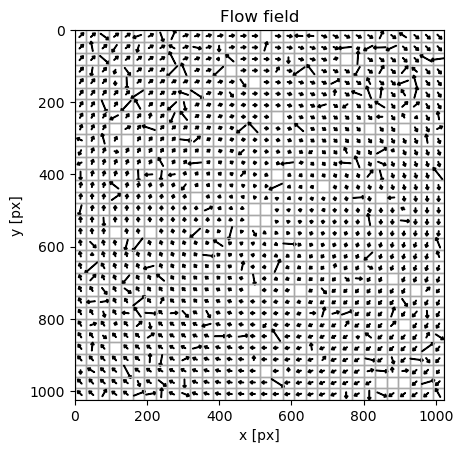

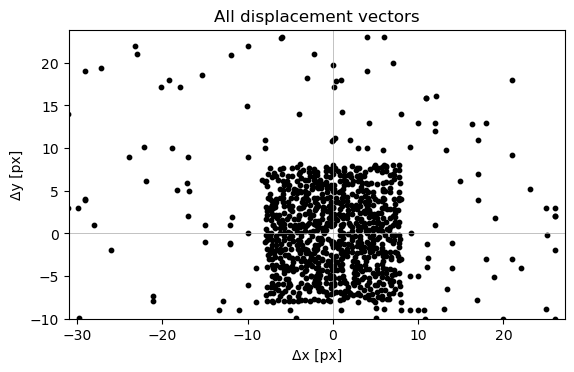

In [6]:
images =  piv.read_image_directory('PIVimages/tracerDensity/1')

# Do simple PIV
# windows, coordinates = piv.divide_in_windows(images, 128)
# 
# correlation = piv.correlate_image_pair(windows[0,1,1], windows[1,1,1], plot=False)
# displacement, intensity = piv.find_displacement(correlation, skip_errors=True)

displacements, _ = piv.simple_piv(images, 32, plot=True, subpixel_method='gauss_neighbor', skip_errors=True)

In [12]:
np.all(correlation == 0)

True

/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:131: RuntimeWarning: divide by zero encountered in log
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))
/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:132: RuntimeWarning: divide by zero encountered in log
  / ((np.log(neighbor[0])) + np.log(neighbor[2]) -
/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:131: RuntimeWarning: invalid value encountered in scalar divide
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))


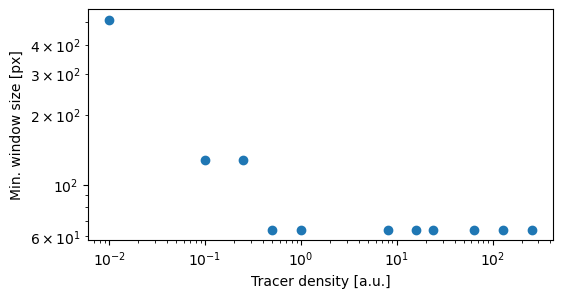

In [2]:
# Load images
images_sets, set_names = piv.read_image_sets('PIVimages/tracerDensity/', grouping_ab=True)

# Test the simple PIV function to see at which window size it gives an error about multiple maxima.
min_window_size = []
window_size_array = [1024, 512, 256, 128, 64, 32, 16, 8, 4, 2]
for i in range(len(images_sets)):
    for window_size in window_size_array:
        try:
            u, v = piv.simple_piv(images_sets[i], window_size, plot=False)
        except:
            min_window_size.append(window_size * 2)
            break
            
# Convert the names to floats
particle_size = [float(i) for i in set_names]

# Make a log-log plot of the particle size vs the minimum window size
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(particle_size, min_window_size, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Tracer density [a.u.]')
ax.set_ylabel('Min. window size [px]')
plt.show()

# TODO: PLOT THE RESULTS
# TODO: Try subpixel?